In [2]:
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
    %tensorflow_version 2.x
except:
    print("Note: not using Google CoLab")
    COLAB = False

Mounted at /content/drive
Note: using Google CoLab


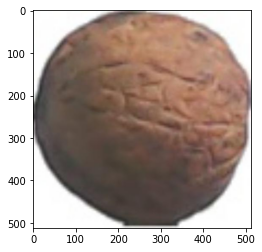

In [3]:
# Take help from HW4 code

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import os
import cv2

DATADIR = "/content/drive/My Drive/Colab Notebooks/multiclass-image-competition-2/train/"
Categories = ["1-Tomato 3","2-Tomato 4","3-Tomato Cherry Red","4-Tomato Maroon","5-Tomato Yellow","6-Walnut"]

for category in Categories:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path,img))
            plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        except Exception as e:
            pass


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
# DATADIR = "/content/drive/My Drive/Colab Notebooks/multiclass-image-competition/train/"
# CATEGORIES = ["1-Tomato 3", "2-Tomato 4","3-Tomato Cherry Red","4-Tomato Maroon","5-Tomato Yellow","6-Walnut"]
IMG_SIZE = 32
ary = []
training_data = []
def create_training_data():
    for category in Categories:
        path = os.path.join(DATADIR, category)
        class_num = Categories.index(category)
        for img in os.listdir(path):
            try:
                ary.append(img)
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
                
            except Exception as e:
                pass

create_training_data()
print(len(training_data))
print(len(ary))

random.shuffle(training_data)
X=[]
Y=[]
for features, label in training_data:
    X.append(features)
    Y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE,3)
Y = np.array(Y)
X = X/255.0

2330
2330


In [5]:

X.shape

(2330, 32, 32, 3)

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import pickle

x_train, x_test, y_train, y_test = train_test_split(    
    X, Y, test_size=0.2, random_state=42)

print("X.shape=",X.shape)
print("x_train.shape=",x_train.shape)
print("y_train.shape=",y_train.shape)
print("x_test.shape=",x_test.shape)
print("y_test.shape=",y_test.shape)

model = Sequential()

model.add(Conv2D(32,(3,3),input_shape=X.shape[1:]))
model.add(Activation("relu"))


model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))


model.add(Dropout(0.2))
model.add(Dense(32))
model.add(Dense(16))
model.add(Dense(6))
model.add(Activation('softmax'))


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train,epochs=18,validation_data=(x_test,y_test),verbose=2)

X.shape= (2330, 32, 32, 3)
x_train.shape= (1864, 32, 32, 3)
y_train.shape= (1864,)
x_test.shape= (466, 32, 32, 3)
y_test.shape= (466,)
Epoch 1/18
59/59 - 1s - loss: 0.8471 - accuracy: 0.6577 - val_loss: 0.1230 - val_accuracy: 0.9657
Epoch 2/18
59/59 - 0s - loss: 0.1445 - accuracy: 0.9447 - val_loss: 0.0744 - val_accuracy: 0.9871
Epoch 3/18
59/59 - 0s - loss: 0.0306 - accuracy: 0.9936 - val_loss: 0.0077 - val_accuracy: 1.0000
Epoch 4/18
59/59 - 0s - loss: 0.0067 - accuracy: 0.9995 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 5/18
59/59 - 0s - loss: 0.0053 - accuracy: 0.9984 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 6/18
59/59 - 0s - loss: 0.0042 - accuracy: 0.9989 - val_loss: 7.9354e-04 - val_accuracy: 1.0000
Epoch 7/18
59/59 - 0s - loss: 0.0016 - accuracy: 1.0000 - val_loss: 3.3682e-04 - val_accuracy: 1.0000
Epoch 8/18
59/59 - 0s - loss: 5.6107e-04 - accuracy: 1.0000 - val_loss: 1.6711e-04 - val_accuracy: 1.0000
Epoch 9/18
59/59 - 0s - loss: 4.9362e-04 - accuracy: 1.0000 - val

In [8]:
model.evaluate(x_test,y_test)

15/15 [==============================] - 0s 3ms/step - loss: 1.9298e-05 - accuracy: 1.0000


[1.9298418919788674e-05, 1.0]

In [9]:
#prediction of training data
ddd = model.predict(x_test)
yyy = [np.argmax(element) for element in ddd]
print(yyy[:5])

[4, 0, 1, 1, 2]


In [10]:
#checking classification report for accuracy
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
print("Classification Report: \n", classification_report(y_test, yyy))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        94
           2       1.00      1.00      1.00        71
           3       1.00      1.00      1.00        42
           4       1.00      1.00      1.00        81
           5       1.00      1.00      1.00       111

    accuracy                           1.00       466
   macro avg       1.00      1.00      1.00       466
weighted avg       1.00      1.00      1.00       466



In [11]:
testing_data = "/content/drive/My Drive/Colab Notebooks/multiclass-image-competition-2/test/"

IMG_SIZE = 32
a = []
test_data = []
def create_test_data():
        path = os.path.join(testing_data)
        # class_num = Categories.index(category)
        for img in os.listdir(path):
            try:
                a.append(img)
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                test_data.append([new_array])
            except Exception as e:
                pass

create_test_data()
print(len(test_data))


579


In [12]:
a[577]


'6ac3ec3b73c191533364baf6f41e5e3dac16966ef150af1cc8eed0caaf37746b.jpg'

In [13]:
X_text =[]
for features in test_data:
    X_text.append(features)

X_text = np.array(X_text).reshape(-1, IMG_SIZE, IMG_SIZE,3)
X_text = X_text/255.0
X_text.shape

(579, 32, 32, 3)

In [14]:
te_x = model.predict(X_text)
y_classes = [np.argmax(val) for val in te_x]
print(y_classes)
size = len(y_classes)

for i in range(0,size-1):
  y_classes[i] = y_classes[i]+1
  
print(y_classes)






[3, 5, 2, 0, 3, 5, 0, 5, 5, 1, 5, 2, 0, 0, 0, 0, 0, 3, 5, 2, 5, 5, 0, 3, 4, 4, 3, 1, 1, 5, 0, 2, 2, 4, 1, 0, 2, 4, 1, 2, 5, 5, 3, 1, 0, 5, 3, 3, 0, 3, 4, 1, 3, 5, 1, 5, 5, 5, 5, 2, 2, 0, 2, 4, 1, 4, 2, 2, 0, 1, 3, 2, 3, 1, 2, 1, 5, 2, 2, 3, 1, 4, 5, 5, 1, 3, 5, 4, 5, 5, 3, 5, 3, 3, 5, 2, 3, 0, 5, 3, 1, 3, 4, 2, 1, 0, 5, 4, 2, 2, 5, 2, 4, 3, 1, 2, 1, 2, 5, 0, 1, 4, 2, 4, 0, 0, 1, 0, 4, 1, 5, 2, 4, 3, 5, 2, 1, 1, 4, 4, 0, 3, 1, 1, 2, 1, 1, 0, 4, 4, 5, 5, 4, 5, 4, 0, 2, 0, 4, 4, 5, 2, 0, 5, 2, 1, 5, 1, 5, 4, 2, 3, 5, 2, 2, 4, 2, 0, 4, 1, 4, 1, 2, 5, 0, 0, 2, 1, 5, 0, 5, 3, 0, 5, 2, 1, 2, 3, 5, 2, 1, 5, 1, 2, 0, 4, 4, 3, 3, 2, 1, 1, 3, 5, 2, 0, 2, 5, 4, 2, 5, 2, 4, 3, 2, 1, 1, 3, 4, 0, 4, 0, 5, 0, 5, 2, 5, 3, 3, 1, 5, 1, 2, 5, 0, 5, 4, 3, 4, 2, 1, 5, 5, 3, 2, 0, 1, 5, 1, 1, 3, 2, 3, 1, 2, 1, 0, 5, 4, 5, 2, 2, 4, 5, 0, 5, 5, 5, 2, 5, 1, 5, 2, 1, 4, 5, 5, 3, 3, 5, 1, 5, 5, 5, 2, 4, 3, 3, 4, 2, 4, 3, 5, 2, 1, 5, 5, 3, 1, 2, 5, 2, 4, 5, 5, 0, 0, 2, 1, 5, 4, 1, 3, 2, 1, 5, 2, 5, 5, 1, 5, 5, 0, 

In [16]:
#writing into csv file 

import csv 
s = "/content/drive/My Drive/Colab Notebooks/outcome.csv"
file = open(s,"w")
writer = csv.writer(file)
writer.writerow(['filename','category'])

for i in range(0,size):
  qq = a[i]
  ff = y_classes[i]
  writer.writerow([qq,ff])

print("done")







done


In [ ]:
#Sources take help from:
# 1)Take help from HW4 code
# 2)https://www.youtube.com/watch?v=7HPwo4wnJeA&t=1287s 
